In [1]:
from __future__ import division, print_function
from ipywidgets import interact, interactive, fixed, interact_manual    
import ipywidgets as widgets
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy as sp
from scipy import ndimage
from IPython.core.debugger import set_trace
import cv2
import sys
from pprint import pprint
from random import randint
import nuclei.foci as foci
import nuclei
import nuclei.girder as g
import nuclei.girder.time_lapse_data as reader

# I copied this from elipsesAroundNuclei-Tracks-FociCount
# I want to only test the code to find circles on all images in girder.




plt.rcParams['image.cmap'] = 'gist_earth'
matplotlib.rcParams['figure.figsize'] = (11.0, 11.0)



    


In [2]:
import sys
sys.version_info


sys.version_info(major=3, minor=5, micro=2, releaselevel='final', serial=0)

In [3]:

"""
# Get the image from girder.
import girder_client

gc = girder_client.GirderClient(apiUrl= GIRDER_URL+'/api/v1')
gc.authenticate(GIRDER_USERNAME, apiKey=GIRDER_KEY)
"""
source = reader.time_lapse_data()
# 073117 BT549_Sv40_Bt549_SV40 NLS GFP 53BP1 mcherry_2017_07_31__18_31_54series000
source.load('5aaf02831fbb9006233ae6a2')
print("series: %d"%source.get_number_of_series())
print("time steps in series 1: %d"%source.get_series_length(1))
im, item_obj = source.get_image(1,10)

item_id = item_obj['_id']

# Compute circles and put them into into girder.
gray_image = im[:,:,0]
circles = cv2.HoughCircles(gray_image,cv2.HOUGH_GRADIENT,1,50, \
                           param1=50,param2=30,minRadius=50,maxRadius=100)
g.upload_circle_annotation(item_id, circles)

# Link to the image on girder
url = 'https://images.slide-atlas.org/#item/%s'%item_id
from IPython.core.display import display, HTML
display(HTML('<a href="%s">Girder Item</a>'%url))

# Embed the webpage in a frame.  We sould find a solution to only include the viewer.
import IPython
iframe = '<iframe src="' + url + '" width=700 height=700></iframe>'
IPython.display.HTML(iframe)




series: 28
time steps in series 1: 92
image loaded 5aaf02fd1fbb9006233ae7db


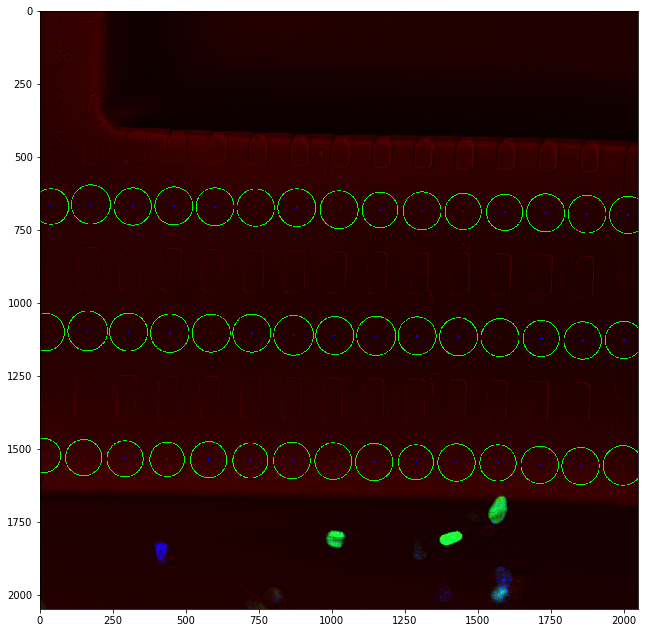

In [10]:
# now do it the old fashion way.

gray_image = im[:,:,0]
#gray_image = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

#plt.imshow(gray_image)

circles = cv2.HoughCircles(gray_image,cv2.HOUGH_GRADIENT,1,50,param1=50,param2=30,minRadius=50,maxRadius=100)
for i in circles[0]:
    # draw the outer circle
    cv2.circle(im,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(im,(i[0],i[1]),2,(0,0,255),3)

plt.imshow(im)
